# PROGRAMACIÓN CON QISKIT: Computación cuántica

Iñigo Gómez Carvajal y Jon Zorrilla Gamboa

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, IBMQ, execute
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

# Load IBM account
IBMQ.save_account("dfecbf18ac776785b132aa874573be3f2684dd957c163556cbdf888187d65d21b2c890e2858d91dee64325ef942e4f7922298ea37dd64e7a72c5b6f2fbaec554")
provider = IBMQ.load_account()
ibmq_qasm_simulator = provider.get_backend('ibmq_qasm_simulator')

configrc.store_credentials:WARNING:2022-11-12 12:23:35,351: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-11-12 12:23:36,158: Credentials are already in use. The existing account in the session will be replaced.


## Puertas cuánticas

En primer lugar, estudiaremos el funcionamiento de puertas cuánticas de 1 qubit y 2 qubits.

#### **Puertas cuánticas de 1 qubit**

Como hemos estudiado, en computación cuántica no existen los bits, si no que se hace uso de qubits. Estos están formados por dos estados indistinguibles a los que les llamaremos $|0\rangle$ y $|1\rangle$. Un qubit, debido a la naturaleza cuántica, está en un estado formado por la superposición de estos estados. De esta manera, podemos definir la función de onda asociada a los qubits de la siguiente manera:
$\begin{equation}
\psi = \alpha |0\rangle + \beta |1\rangle
\end{equation}$
Donde $\alpha$ y $\beta$ son números complejos cuyos módulos cuadrados ($|\alpha|^2$ y $|\beta|^2$) dan la probabilidad de hallar el estado $\psi$ en $|0\rangle$ o $|1\rangle$, respectivamente. Estas probabilidades deben estar normalizadas, de tal manera que $|\alpha|^2 + |\beta|^2 = 1$.

Una de las cualidades más importantes de la física cuántica es que es probabilística, a diferencia de la mecánica clásica, la cual es determinista. Esto significa que un estado cuántico formado por diferentes subestados, tendrá una probabilidad determinada de encontrarse en cada uno de ellos. Como hemos visto previamente, los coeficientes asociados a cada estado al cuadrado cuántico nos darán la probabilidad de hallar el estado cuántico en ese estado determinado. Una vez la función de onda ha pasado de un estado general a un subestado concreto, se dice que la función de onda ha colapsado.

Una puerta cuántica es una matriz U hermítica tal que $U U^\dagger = U^\dagger U = 1$. Los ejemplos a estudiar serán los siguientes: 
    
$
X=\begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix} \quad Y=\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix} \quad Z=\begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}$

También conocidos como matrices de Pauli. Para ello, crearemos un circuito en qiskit con 1 qubit y aplicaremos estas matrices sobre estados iniciales $|0\rangle$.

**Puerta X**

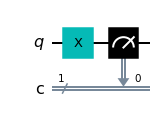

In [ ]:
# Puerta X para un qubit en estado |0>
circuitX = QuantumCircuit(1,1)
circuitX.x(0)

circuitX.measure(0,0)
circuitX.draw('mpl')

**Puerta Y**

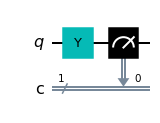

In [ ]:
# Puerta Y para un qubit en estado |0>
circuitY = QuantumCircuit(1,1)
circuitY.y(0)

circuitY.measure(0,0)
circuitY.draw('mpl')

**Puerta Z**

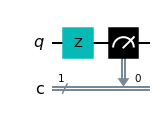

In [ ]:
# Puerta Z para un qubit en estado |0>
circuitZ = QuantumCircuit(1,1)
circuitZ.z(0)

circuitZ.measure(0,0)
circuitZ.draw('mpl')

Si hacemos estos cálculos a mano, teniendo en cuenta que aplicar estas matrices sobre el estado $|0\rangle$ es únicamente multiplicar las matrices X, Y y Z sobre el vector asociado al estado $|0\rangle$, obtendremos lo siguiente:

$X|0\rangle=\begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}0\\ 1\end{pmatrix}=|1\rangle.$

$Y|0\rangle=\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}0\\ i\end{pmatrix}=i|1\rangle.$

$Z|0\rangle=\begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}1\\ 0\end{pmatrix}=|0\rangle$

Esto significa que, una vez aplicamos la matrix X al vector $|0\rangle$, obtendremos de manera unívoca el vector $|1\rangle$, $|1\rangle$ para Y y $|0\rangle$ para Z. El factor i asociado al producto de la matriz Y con $|0\rangle$ no es importante para el estudio del estado cuántico final, pues es únicamente una fase.

Así que, comprobaremos si obtenemos los mismos resultados estudiando los histogramas asociados al conteo del resultado tras la operación.

In [ ]:
# Ejecutamos los circuitos cuánticos
job_X = execute(circuitX, ibmq_qasm_simulator, shots=1024)
job_Y = execute(circuitY, ibmq_qasm_simulator, shots=1024)
job_Z = execute(circuitZ, ibmq_qasm_simulator, shots=1024)

# Hallamos los resultados obtenidos
result_X = job_X.result()
result_Y = job_Y.result()
result_Z = job_Z.result()

# Hacemos un conteo de los resultados
counts_X = result_X.get_counts(circuitX)
counts_Y = result_Y.get_counts(circuitY)
counts_Z = result_Z.get_counts(circuitZ)

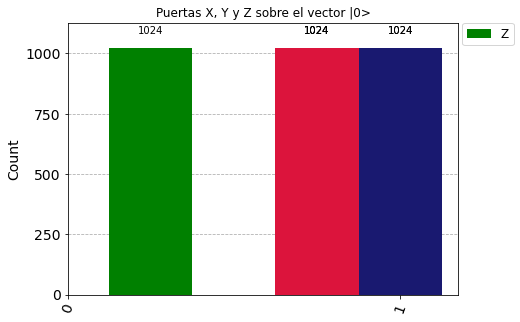

In [ ]:
legend = ['X', 'Y', 'Z']
plot_histogram([counts_X,counts_Y,counts_Z], color=['crimson','midnightblue','green'], title="Puertas X, Y y Z sobre el vector |0>", legend=legend)

Como podemos ver, obtenemos los resultados esperados. Para X e Y obtenemos el 100% de los estados en el estado $|1\rangle$ y para Z el 100% de los estados en $|0\rangle$.

Además de las puertas cuánticas de 1 qubit X, Y y Z, existen las puertas S, T y Hadamard, que son combinaciones lineales de las puertas X, Y y Z. Más adelante, estudiaremos la puerta Hadamard.

#### **Puertas cuánticas de 2 qubits**

Este tipo de puertas operan sobre 2 qubits. En este caso, haremos un estudio de la puerta cuántica CNOT. El funcionamiento de la puerta CNOT es el siguiente: si el bit de control está en el estado $|1\rangle$, invierte el bit objetivo.

Esta puerta cuántica se representa por la siguiente matriz de 4x4:

$C = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \end{pmatrix}$

En este caso, como estamos operando sobre 2 qubits, tendremos vectores de 4 componentes que describen el estado cuántico. De esta manera, podemos definir los siguientes vectores que son combinaciones de los estados cuánticos asociados a $|0\rangle$ y $|1\rangle.$

$|0\rangle \otimes |0\rangle = |00\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$

$|0\rangle \otimes |1\rangle = |01\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}$

$|1\rangle \otimes |0\rangle = |10\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}$

$|1\rangle \otimes |1\rangle = |11\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}$

Entonces, cuando operamos la matriz CNOT sobre el estado inicial $|00\rangle$:

$\begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = |00\rangle$

Lo deja invariante; estudiaremos el resultado tras la ejecución.

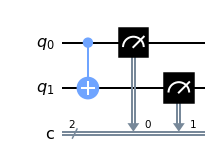

In [ ]:
circuit_cnot = QuantumCircuit(2,2)
circuit_cnot.cx(0, 1)

circuit_cnot.measure([0,1],[0,1])
circuit_cnot.draw('mpl')

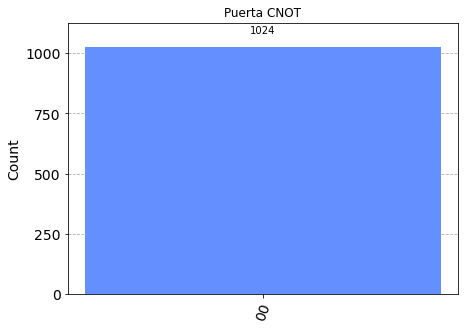

In [ ]:
job_cnot = execute(circuit_cnot, ibmq_qasm_simulator, shots=1024)
result_cnot = job_cnot.result()
counts_cnot = result_cnot.get_counts(circuit_cnot)

plot_histogram(counts_cnot, title="Puerta CNOT")

Tal y como podemos observar, obtenemos como estado final el estado $|00\rangle$ el 100% de las veces.

Ahora, haremos un estudio de la puerta Hadamard. Esta puerta es una puerta cuántica muy interesante porque su función principal es poner en superposición dos qubits distintos:

$H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$

Cuando se aplica sobre un estado cuántico:

$H |0\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) = |+\rangle$

$H |1\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) = |-\rangle$

Y, hemos definido dos nuevos estados cuánticos $|+\rangle$ y $|-\rangle$ como combinación lineal de los estados iniciales.

Ahora, simularemos la puerta de Hadamard:

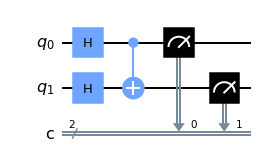

In [ ]:
circuit_cnot = QuantumCircuit(2, 2)
circuit_cnot.h(0)
circuit_cnot.h(1)
circuit_cnot.cx(0, 1)
circuit_cnot.measure([0,1],[0,1])
circuit_cnot.draw('mpl')

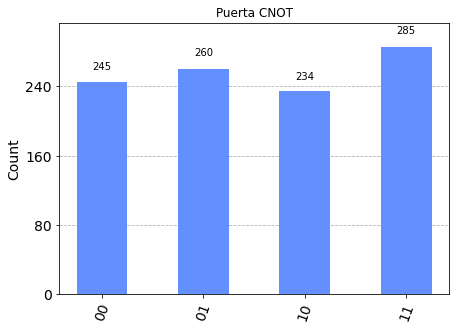

In [ ]:
job_cnot = execute(circuit_cnot, ibmq_qasm_simulator, shots=1024)
result_cnot = job_cnot.result()
counts_cnot = result_cnot.get_counts(circuit_cnot)

plot_histogram(counts_cnot, title="Puerta CNOT")

Tal y como podemos observar, aproximadamente habrá un 25% de probabilidades de hallar los 4 estados finales. Cuantas más simulaciones realicemos, más cercanas serán estas probabilidades. 

## Generación de números aleatorios

Haciendo uso de puertas Hadamard, implementaremos un generador de números aleatorios de 6 bits. En primer lugar, estudiaremos los resultados obtenidos en un simulador normal mediante métodos de python y luego mediante un ordenador cuántico real. Para ello, haremos uso de 6 qubits en superposición y haremos medidas mediante las puertas Hadamard, la cual dará un 50% de probabilidades de hallar cada estado cuántico $|0\rangle$ o $|1\rangle$.

Números aleatorios en un simulador:

In [ ]:
np.random.seed(123)
values = []
dic = {}
for i in range(1024):
    values.append(random.randrange(0, 64, 1))
for item in values:
    if item not in dic:
        dic[item] = 1
    else:
        dic[item] += 1

Text(0, 0.5, 'Counts')

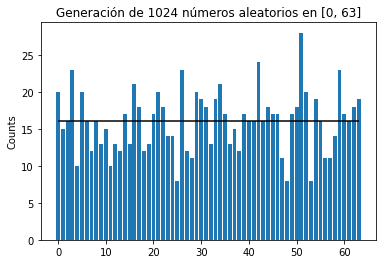

In [ ]:
plt.bar(dic.keys(), dic.values())
plt.hlines(16,0,63, color = 'black')
plt.title("Generación de 1024 números aleatorios en [0, 63]")
plt.ylabel("Counts")

Número aleatorios en un ordenador cuántico:

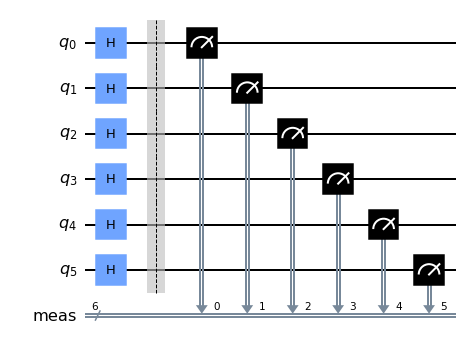

In [ ]:
circuit_random = QuantumCircuit(6)
circuit_random.h(QuantumRegister(6, 'q'))
circuit_random.measure_all()
circuit_random.draw('mpl')

In [ ]:
job_random = execute(circuit_random, ibmq_qasm_simulator, shots=1024)
result_random = job_random.result()
counts_random = job_random.result().get_counts(circuit_random)

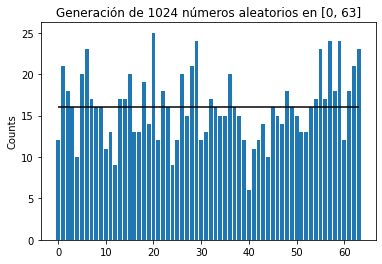

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1}


In [ ]:
counts =  counts_random.values()
values = range(len(counts))
plt.bar(values,counts)
plt.hlines(16,0,63, color = 'black')
plt.title("Generación de 1024 números aleatorios en [0, 63]")
plt.ylabel("Counts")
plt.show()
dic = {}
for item in values:
    if item not in dic:
        dic[item] = 1
    else:
        dic[item] += 1
print(dic)

Como podemos ver en el histograma, se generarán 1024 número aleatorios entre 0 y 63, pues hemos fijado 6 qubits. Se puede ver como la distribución es bastante uniforme. También hemos dibujado una línea horizontal que representa el valor medio que se obtendría para un número infinito de simulaciones, correspondiente a $\frac{1024}{64} = 16$.

## Entrelazamiento

Realizamos el siguiente circuito:

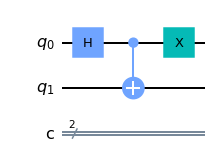

In [ ]:
circuit_e = QuantumCircuit(2, 2)
circuit_e.h(0)
circuit_e.cx(0, 1)
circuit_e.x(0)
circuit_e.draw(output='mpl')

Ahora, guardaremos los resultados para estudiar que es lo que está sucedientdo.

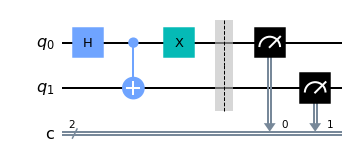

In [ ]:
circuit_e.barrier()
circuit_e.measure([0,1],[0,1])
circuit_e.draw(output="mpl")

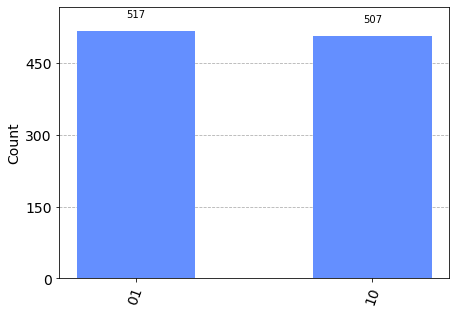

In [ ]:
result_e = execute(circuit_e, ibmq_qasm_simulator, shots=1024).result()
counts_e = result_e.get_counts(circuit_e)
plot_histogram(counts_e)

Podemos observar que únicamente hay dos estados cuánticos finales, $|01\rangle$ y $|10\rangle$, mientras que lo estados $|00\rangle$ y $|11\rangle$ no aparecen.

Se dice que estos estados cuánticos están entrelazados porque el conocimiento del estado de un qubit nos da información directa del estado del otro qubit. Por ejemplo, si el primer qubit está en estado $|0\rangle$, el segundo estará en estado $|1\rangle$; y si el primero está en estado $|1\rangle$, el segundo estará en estado $|0\rangle$ siempre.

El estado cuántico final será uno de los dos siguientes: $\frac{1}{\sqrt{2}}(|10\rangle + |01\rangle)$ o $\frac{1}{\sqrt{2}}(|10\rangle - |01\rangle)$.

## Sumador de 2 qubits

Realizamos el siguiente circuito cuántico, formado por puertas XOR y AND reversibles.

Un sumador de dos bits debe dar las siguientes salidas para las siguientes entradas:

Si la entrada es (0,0) $\rightarrow$ La salida será (0,0)

Si la entrada es (0,1) $\rightarrow$ La salida será (0,1)

Si la entrada es (1,0) $\rightarrow$ La salida será (0,1)

Si la entrada es (1,1) $\rightarrow$ La salida será (1,0)

In [ ]:
def crear_qc(a,b):
    qc = QuantumCircuit(4,2)
    if a == 1:
        qc.x(0)
    if b == 1:
        qc.x(1)
    qc.barrier()
    qc.cx(0, 2)
    qc.cx(1, 2)
    qc.ccx(0,1,3)
    qc.barrier()
    qc.measure(2,0)
    qc.measure(3,1)
    return qc

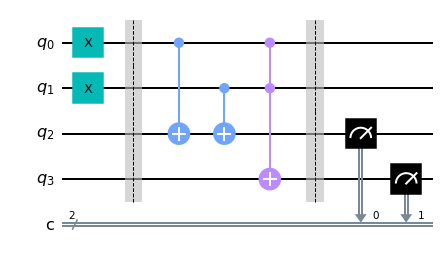

In [ ]:
crear_qc(1,1).draw(output="mpl")

Haremos una breve explicación del funcionamiento del circuito:

En primer lugar, se definen los qubits que se van a medir, que son el primer y segundo, que se dan en estado $|0\rangle$ por defecto. Por ello, creamos una puerta NOT de manera manual para que el estado cuántico cambie de $|0\rangle$ a $|1\rangle$.

Luego, tenemos una puerta CNOT y una puerta NOT, cuyo resultado será 1 si las dos entradas son iguales. Después, tenemos una puerta NOT (añadiendo una puerta CNOT en los dos primeros qubits) tal que se aplica un NOT en el qubit objetivo cuando los dos qubits de control estén en estado 1.

Por último, se miden los qubits 2 y 3.

Comprobamos el funcionamiento de este circuito. Para ello, estudiaremos el resultado para las distintas entradas.

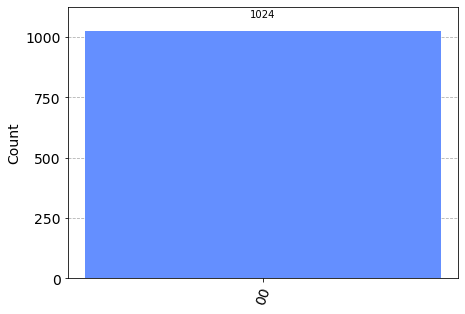

In [ ]:
# Entradas 0,0
qc = crear_qc(0,0)
result_00 = execute(qc, ibmq_qasm_simulator, shots=1024).result()
counts_00 = result_00.get_counts(qc)
plot_histogram(counts_00)

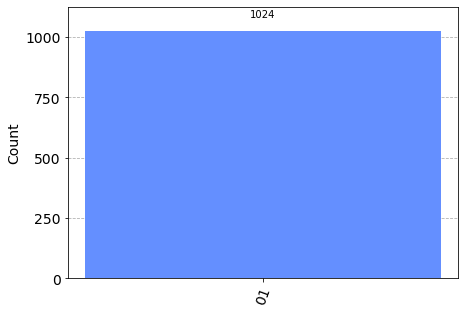

In [ ]:
# Entradas 0,1
qc = crear_qc(0,1)
result_01 = execute(qc, ibmq_qasm_simulator, shots=1024).result()
counts_01 = result_01.get_counts(qc)
plot_histogram(counts_01)

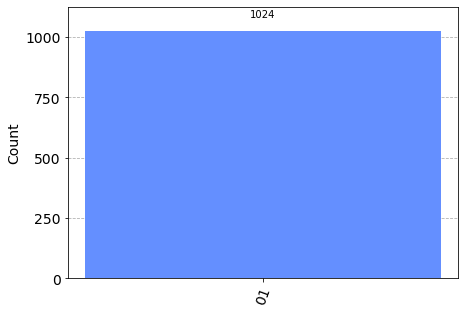

In [ ]:
# Entradas 1,0
qc = crear_qc(1,0)
result_10 = execute(qc, ibmq_qasm_simulator, shots=1024).result()
counts_10 = result_10.get_counts(qc)
plot_histogram(counts_10)

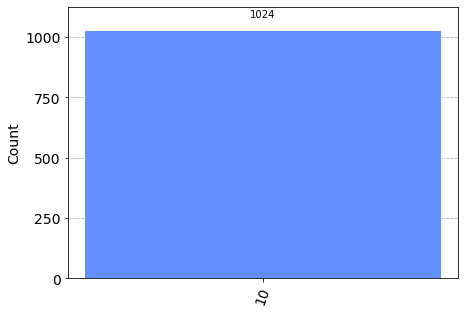

In [ ]:
# Entradas 1,1
qc = crear_qc(1,1)
result_11 = execute(qc, ibmq_qasm_simulator, shots=1024).result()
counts_11 = result_11.get_counts(qc)
plot_histogram(counts_11)

Como podemos observar, obtenemos los resultados esperados el 100% de las veces.